In [2]:
# Import independecies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
def goodness_of_fit(x,rv,K):
    observed,_ = np.histogram(np.array(x), bins = K)
    expected,_ = np.histogram(np.array(rv.pdf(x)), bins = K)
    statistic, p_value = stats.chisquare(observed,expected)
    return statistic, p_value

In [3]:
# Dataset import

df = pd.read_csv('Data_File.csv').transpose().reset_index()
df.columns = df.iloc[0]
df.drop(df.index[0], inplace = True)
df = df.astype(float)
df.dtypes

0
Interarrival Times                                         float64
Service Times for Initial Phase                            float64
Service Times for Placing Keyboard and Mouse               float64
Service Times for Assembling the Case (Aluminum Plates)    float64
dtype: object

In [4]:
# Moment test

for i in range(0, 4): 
    SK = stats.skew(df.iloc[:, i])
    print(f"The third moment of dataset {i + 1} is : {SK}")

The third moment of dataset 1 is : 2.121713039172277
The third moment of dataset 2 is : -0.05624441274281052
The third moment of dataset 3 is : -0.038270259120370326
The third moment of dataset 4 is : 0.13821593006444158


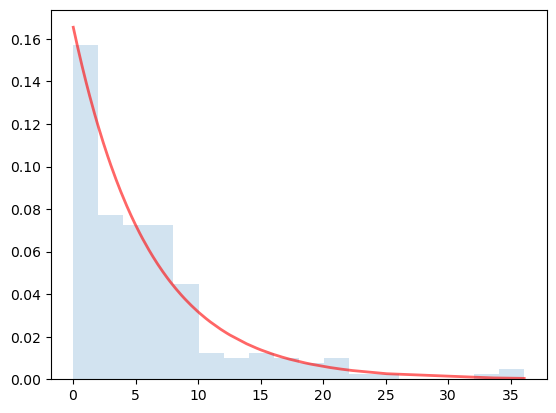

0.021461 6.0438618994999995
Test Statistic:  427.5961092048048
P Value:  1.7586846231992617e-86
Accept


In [22]:
# Distribution Fit for Dataset 1

x = df['Interarrival Times'].sort_values()
loc, scale = stats.expon.fit(x)
rv = stats.expon(loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")


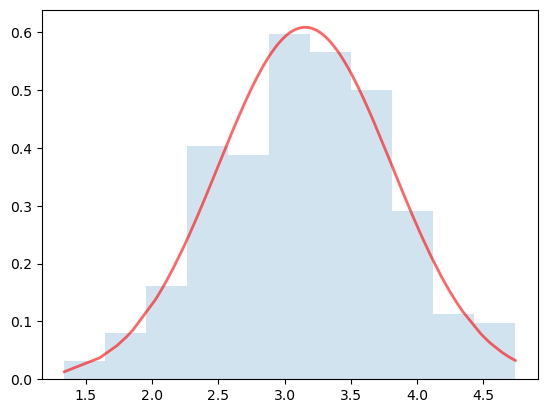

3.1544957 0.6553484709118577
Test Statistic:  205.3636333165745
P Value:  2.485117343907853e-39
Accept


In [23]:
# Distribution Fit for Dataset 2

x = df['Service Times for Initial Phase'].sort_values()
loc, scale = stats.norm.fit(x)
rv = stats.norm(loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")

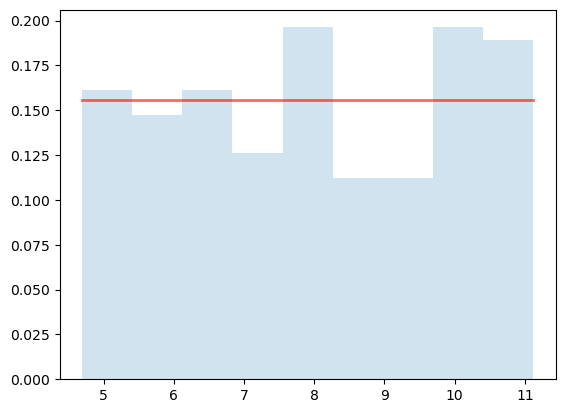

4.69499 6.42111
Test Statistic:  inf
P Value:  0.0
Accept


/Users/Kevin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [24]:
# Distribution Fit for Dataset 3

x = df['Service Times for Placing Keyboard and Mouse'].sort_values()
loc, scale = stats.uniform.fit(x)
rv = stats.uniform(loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")

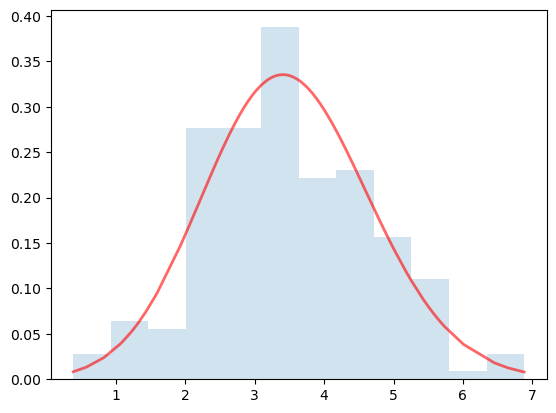

0.04962383498813133 -20.531143832181233 23.994859857929335
Test Statistic:  668.3353174603175
P Value:  4.4220114624610256e-138
Accept


In [25]:
# Distribution Fit for Dataset 4 - Lognorm

x = df['Service Times for Assembling the Case (Aluminum Plates)'].sort_values()
s, loc, scale = stats.lognorm.fit(x)
rv = stats.lognorm(s, loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(s,loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")

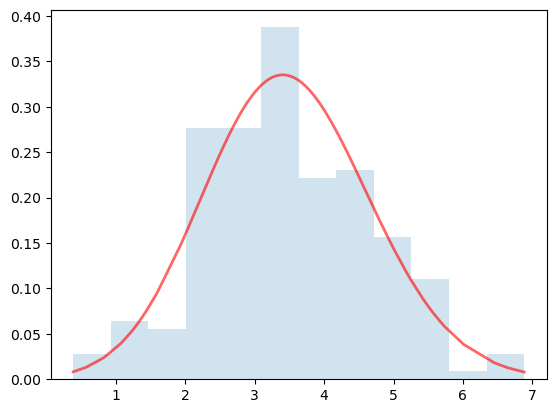

176.71221047718836 -12.364805293769315 0.08973959327064643
Test Statistic:  668.1855244996549
P Value:  4.762196330914424e-138
Accept


In [26]:
# Gamma
x = df['Service Times for Assembling the Case (Aluminum Plates)'].sort_values()
a, loc, scale = stats.gamma.fit(x)
rv = stats.gamma(a, loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(a,loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")

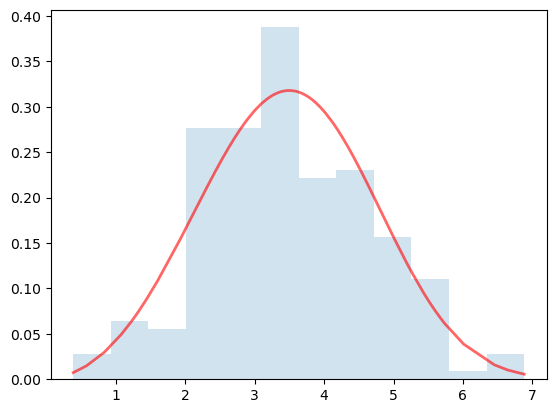

3.3461766498667407 -0.16233891381617488 4.069174948175686
Test Statistic:  802.0236702428007
P Value:  7.797875511957197e-167
Accept


In [27]:
# Weibull
x = df['Service Times for Assembling the Case (Aluminum Plates)'].sort_values()
c, loc, scale = stats.weibull_min.fit(x)
rv = stats.weibull_min(c, loc, scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x),
       'r-', lw=2, alpha=0.6, label='expon pdf')
ax.hist(x, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2) 
plt.show()
print(c,loc,scale)
K = 10
statistic,p_value = goodness_of_fit(x,rv,K)
if p_value < 0.05:
       print("Test Statistic: ", statistic)
       print("P Value: ", p_value)
       print("Accept")
else:
       print("Reject")